## Question1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 
<ol>
<li>Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.</li>
<li>What metric would you report for this dataset?</li>
<li>What is its value?</li>
</ol>

In [1]:
#to print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Set to 2 decimal places, and display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

### Loading the dataset

In [5]:
sneakers = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [6]:
sneakers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.00,53.00,746.00,224.00,2.00,cash,2017-03-13 12:36:56.190
1,2.00,92.00,925.00,90.00,1.00,cash,2017-03-03 17:38:51.999
2,3.00,44.00,861.00,144.00,1.00,cash,2017-03-14 04:23:55.595
3,4.00,18.00,935.00,156.00,1.00,credit_card,2017-03-26 12:43:36.649
4,5.00,18.00,883.00,156.00,1.00,credit_card,2017-03-01 04:35:10.773


### Understanding the Data 

In [7]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   float64       
 1   shop_id         5000 non-null   float64       
 2   user_id         5000 non-null   float64       
 3   order_amount    5000 non-null   float64       
 4   total_items     5000 non-null   float64       
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 273.6+ KB


In [8]:
#converting ids to int from float
sneakers = sneakers.astype({"order_id":'int', "shop_id":'int', "user_id":'int'})

In [9]:
sneakers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224.00,2.00,cash,2017-03-13 12:36:56.190
1,2,92,925,90.00,1.00,cash,2017-03-03 17:38:51.999
2,3,44,861,144.00,1.00,cash,2017-03-14 04:23:55.595
3,4,18,935,156.00,1.00,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156.00,1.00,credit_card,2017-03-01 04:35:10.773


In [10]:
sneakers.isna().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

**Data Cleaning:** Since the data is pretty clean now and has no null values, data cleaning is not needed at this moment. There might be a need to clean up in the process of further analysis.

In [11]:
sneakers.shape

(5000, 7)

### Feature Engineering

To have a better understanding of the sneaker prices in each store, we will divide the order amount of each order by the number of items bought, because all the stores sell the same model of sneakers.

In [12]:
sneakers['amt_per_item'] = sneakers['order_amount']/sneakers['total_items']
sneakers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amt_per_item
0,1,53,746,224.00,2.00,cash,2017-03-13 12:36:56.190,112.00
1,2,92,925,90.00,1.00,cash,2017-03-03 17:38:51.999,90.00
2,3,44,861,144.00,1.00,cash,2017-03-14 04:23:55.595,144.00
3,4,18,935,156.00,1.00,credit_card,2017-03-26 12:43:36.649,156.00
4,5,18,883,156.00,1.00,credit_card,2017-03-01 04:35:10.773,156.00


### Exploratory Data Analysis

In [13]:
sneakers.describe()

,order_id,shop_id,user_id,order_amount,total_items,amt_per_item
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,50.08,849.09,3145.13,8.79,387.74
std,1443.52,29.01,87.80,41282.54,116.32,2441.96
min,1.00,1.00,607.00,90.00,1.00,90.00
25%,1250.75,24.00,775.00,163.00,1.00,133.00
50%,2500.50,50.00,849.00,284.00,2.00,153.00
75%,3750.25,75.00,925.00,390.00,3.00,169.00
max,5000.00,100.00,999.00,704000.00,2000.00,25725.00


**Insight:** The above statistics show that standard deviation of order_amount is very high.

In [14]:
sneakers.order_amount.mean()

3145.128

<AxesSubplot:xlabel='order_amount', ylabel='Density'>

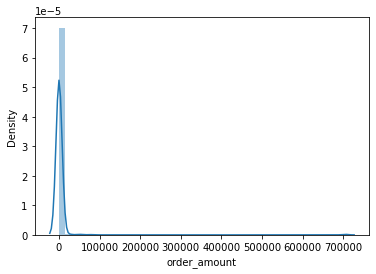

In [15]:
sns.distplot(sneakers.order_amount)

In [16]:
sneakers.order_id.nunique()
sneakers.shop_id.nunique()
sneakers.user_id.nunique()

5000

100

301

In [17]:
#no of orders and customers in each store
sneakers.groupby('shop_id')[['order_id','user_id']].nunique().sort_values(by='order_id', ascending=False)

,order_id,user_id
shop_id,,
53,68,60
71,66,62
19,64,60
13,63,56
89,61,56
...,...,...
74,38,37
56,37,34
67,37,35


In [18]:
#no of stores visited by each user
sneakers.groupby('user_id')[['shop_id']].nunique().sort_values(by='shop_id', ascending=False)

,shop_id
user_id,
791,25
718,25
787,23
786,23
823,23
...,...
833,9
766,9
750,6


In [19]:
#no of orders for each person
sneakers.groupby('user_id')[['order_id']].nunique().sort_values(by='order_id', ascending=False)

,order_id
user_id,
718,28
868,27
791,26
847,26
787,25
...,...
955,9
719,9
998,9


In [20]:
#avg order amt per store
sneakers.groupby('shop_id')[['order_amount']].mean().sort_values(by='order_amount', ascending=False)

,order_amount
shop_id,
42,235101.49
78,49213.04
50,403.55
90,403.22
38,390.86
...,...
53,214.12
100,213.68
32,189.98


**Insight**: This indicates that shop_id 42 is an outlier having very high average order amount of 235101.

In [21]:
#avg order amt per user - Average Revenue Per User (ARPU)
sneakers.groupby('user_id')[['order_amount']].mean().sort_values(by='order_amount', ascending=False)

,order_amount
user_id,
607,704000.00
878,14266.91
766,8007.60
834,6019.00
915,5785.14
...,...
892,227.31
899,226.67
827,226.50


**Insight:** Computing the Average Revenue Per User (ARPU), which is a common retail KPI, we can see that a user with id 607 has a very high amount of average order amount. This is an anomaly in the dataset.

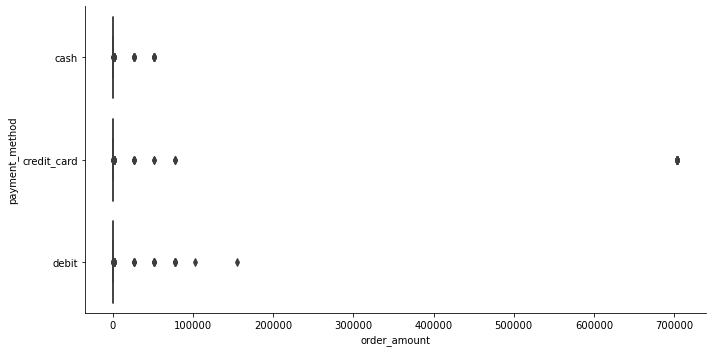

In [22]:
#different payment types in each percentile
sns.catplot(y='payment_method', data=sneakers, x='order_amount', aspect=2, kind='box')

In [23]:
#payment method vs orders
sneakers.groupby('payment_method')[['order_id']].nunique().sort_values(by='order_id', ascending=False)

,order_id
payment_method,
credit_card,1735
debit,1671
cash,1594


In [24]:
#payment method vs users
sneakers.groupby('payment_method')[['user_id']].nunique().sort_values(by='user_id', ascending=False)

,user_id
payment_method,
credit_card,301
debit,300
cash,297


This shows that there is not much deviation in the users and orders with respect to payment methods.

In [25]:
#payment method vs order amount
sneakers.groupby('payment_method')[['order_amount']].mean().sort_values(by='order_amount', ascending=False)

,order_amount
payment_method,
credit_card,7461.59
debit,966.84
cash,730.35


We can see that average order amount is approximately 7-10 times higher when being paid by credit_card vs debit or cash. 

In [26]:
sneakers.groupby(['user_id','payment_method'])[['order_amount']].mean().sort_values(by='order_amount', ascending=False)

,,order_amount
user_id,payment_method,
607,credit_card,704000.00
766,credit_card,38760.50
878,debit,31116.20
915,debit,25910.33
817,debit,19440.25
...,...,...
908,cash,136.25
878,credit_card,123.50
885,credit_card,101.00


In [27]:
sneakers[sneakers.user_id!=607].groupby(['user_id','payment_method'])[['order_amount']].mean().sort_values(by='order_amount', ascending=False)

,,order_amount
user_id,payment_method,
766,credit_card,38760.50
878,debit,31116.20
915,debit,25910.33
817,debit,19440.25
828,credit_card,17396.00
...,...,...
908,cash,136.25
878,credit_card,123.50
885,credit_card,101.00


In [28]:
sneakers[sneakers.user_id == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amt_per_item
15,16,42,607,704000.00,2000.00,credit_card,2017-03-07 04:00:00,352.00
60,61,42,607,704000.00,2000.00,credit_card,2017-03-04 04:00:00,352.00
520,521,42,607,704000.00,2000.00,credit_card,2017-03-02 04:00:00,352.00
1104,1105,42,607,704000.00,2000.00,credit_card,2017-03-24 04:00:00,352.00
1362,1363,42,607,704000.00,2000.00,credit_card,2017-03-15 04:00:00,352.00
1436,1437,42,607,704000.00,2000.00,credit_card,2017-03-11 04:00:00,352.00
1562,1563,42,607,704000.00,2000.00,credit_card,2017-03-19 04:00:00,352.00
1602,1603,42,607,704000.00,2000.00,credit_card,2017-03-17 04:00:00,352.00
2153,2154,42,607,704000.00,2000.00,credit_card,2017-03-12 04:00:00,352.00
2297,2298,42,607,704000.00,2000.00,credit_card,2017-03-07 04:00:00,352.00


**Insight**: This shows that the user 607 has been consistently buying 2000 sneakers at the cost of 352 per sneaker, hence his average order amount looks like an outlier.

In [29]:
sneakers.order_amount.describe()

count     5000.00
mean      3145.13
std      41282.54
min         90.00
25%        163.00
50%        284.00
75%        390.00
max     704000.00
Name: order_amount, dtype: float64

In [30]:
sneakers[(sneakers.order_amount <= sneakers.order_amount.quantile(1)) & (sneakers.order_amount >= sneakers.order_amount.quantile(0.75))]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amt_per_item
14,15,87,849,447.00,3.00,credit_card,2017-03-10 11:23:18.057,149.00
15,16,42,607,704000.00,2000.00,credit_card,2017-03-07 04:00:00.000,352.00
19,20,63,898,408.00,3.00,credit_card,2017-03-29 15:11:52.292,136.00
21,22,97,789,486.00,3.00,credit_card,2017-03-04 15:44:00.021,162.00
22,23,88,985,704.00,4.00,credit_card,2017-03-22 01:19:40.945,176.00
...,...,...,...,...,...,...,...,...
4974,4975,7,925,448.00,4.00,credit_card,2017-03-24 13:13:53.597,112.00
4980,4981,50,942,772.00,4.00,credit_card,2017-03-23 05:15:19.160,193.00
4984,4985,44,966,432.00,3.00,credit_card,2017-03-15 20:12:31.052,144.00
4985,4986,8,916,396.00,3.00,debit,2017-03-15 14:22:50.510,132.00


**Insight**: This shows that there are 1287 orders out of 5000 orders in the 4th quartile, increasing the average order value

(array([4.972e+03, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01]),
 array([9.00000e+01, 7.04810e+04, 1.40872e+05, 2.11263e+05, 2.81654e+05,
        3.52045e+05, 4.22436e+05, 4.92827e+05, 5.63218e+05, 6.33609e+05,
        7.04000e+05]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of order_amount')

Text(0.5, 0, 'Order Amount')

Text(0, 0.5, 'Count')

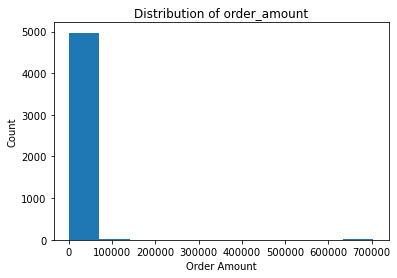

In [31]:
plt.hist(sneakers['order_amount'])
plt.title('Distribution of order_amount')
plt.xlabel('Order Amount')
plt.ylabel('Count')

In [32]:
sneakers.shape

(5000, 8)

In [33]:
#avg single order amt per user
sneakers.groupby('user_id')[['amt_per_item']].mean().sort_values(by='amt_per_item', ascending=False)

,amt_per_item
user_id,
855,3162.24
812,2988.22
766,2704.90
878,2468.82
867,2468.55
...,...
964,138.38
826,138.33
806,138.30


In [34]:
#avg single order amt per shop
sneakers.groupby('shop_id')[['amt_per_item']].mean().sort_values(by='amt_per_item', ascending=False)

,amt_per_item
shop_id,
78,25725.00
42,352.00
12,201.00
89,196.00
99,195.00
...,...
53,112.00
100,111.00
32,101.00


**Insight**: Shop 78 has been selling each sneaker at a price of 25725.

In [35]:
sneakers[sneakers.shop_id == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amt_per_item
160,161,78,990,25725.00,1.00,credit_card,2017-03-12 05:56:56.834,25725.00
490,491,78,936,51450.00,2.00,debit,2017-03-26 17:08:18.911,25725.00
493,494,78,983,51450.00,2.00,cash,2017-03-16 21:39:35.400,25725.00
511,512,78,967,51450.00,2.00,cash,2017-03-09 07:23:13.640,25725.00
617,618,78,760,51450.00,2.00,cash,2017-03-18 11:18:41.848,25725.00
691,692,78,878,154350.00,6.00,debit,2017-03-27 22:51:43.203,25725.00
1056,1057,78,800,25725.00,1.00,debit,2017-03-15 10:16:44.830,25725.00
1193,1194,78,944,25725.00,1.00,debit,2017-03-16 16:38:25.551,25725.00
1204,1205,78,970,25725.00,1.00,credit_card,2017-03-17 22:32:21.438,25725.00
1259,1260,78,775,77175.00,3.00,credit_card,2017-03-27 09:27:19.843,25725.00


In [36]:
#Average after removing shop 78 from calculation
np.mean(sneakers[sneakers['shop_id'] != 78]['amt_per_item'])

152.47557529269278

### 1a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

- As per the statistics, standard deviation in of order_amount is high, which indicates the presence of outliers. 
- shop_id 78 has anomalously high sneaker price. Although it is the same product is same across all shops, price must have been appreciated by some activity, for eg, some celibrity would habe signed the sneaker.
- user_id 607 is an outlier in terms over average order amount. Deep diving into the shops the customer has bought the sneakers from, proved that even though sneaker price is not high, single user is buying large quantity of sneakers, maybe someone is hoarding and reselling offline.

### 1b. What metric would you report for this dataset?


#### Metric1
To fix the given Average Order Value metric, we can perform the following computation instead:  
AOV = Sum of order amount/Sum of total items

In [37]:
AOV_fixed = sum(sneakers.order_amount)/sum(sneakers.total_items)
AOV_fixed

357.92152221412965

#### Metric2
Instead of averaging at order level, we should consider average of average of orders for each user. In other words, we can find average sneaker price per user as follows:  
avg1 = avg(amount spent on sneakers by each user)   
AOV_effective = average of sneakers price for all users for all shops = avg(avg1)  
 
This metric has following properties:    
- get rids of anomalies at user/shop level transactions without additional filtering
- quick to compute
- gives a better insight into selling price of a sneaker

In [38]:
avg1 = sneakers.groupby(['user_id'])[['amt_per_item']].mean()
avg1

,amt_per_item
user_id,
607,352.00
700,158.81
701,153.38
702,156.23
703,150.44
...,...
995,152.40
996,143.95
997,2117.77


In [39]:
AOV_effective = avg1.mean()
AOV_effective

amt_per_item   398.64
dtype: float64

AOV_effective is higher than AOV_fixed, but it gives a better metric from sales perspective.

### 1c. What is its value?

In [40]:
AOV_fixed

357.92152221412965

In [41]:
AOV_effective

amt_per_item   398.64
dtype: float64

## Question2

 For this question you’ll need to use SQL. Follow this link (https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### 2a. How many orders were shipped by Speedy Express in total?

```mysql
SELECT COUNT(Orders.OrderID) AS TotalOrders,
       Orders.ShipperID,
       Shippers.ShipperName
FROM   Orders
       JOIN Shippers
         ON Orders.ShipperID = Shippers.ShipperID
WHERE  Shippers.ShipperName = 'Speedy Express'; 
```

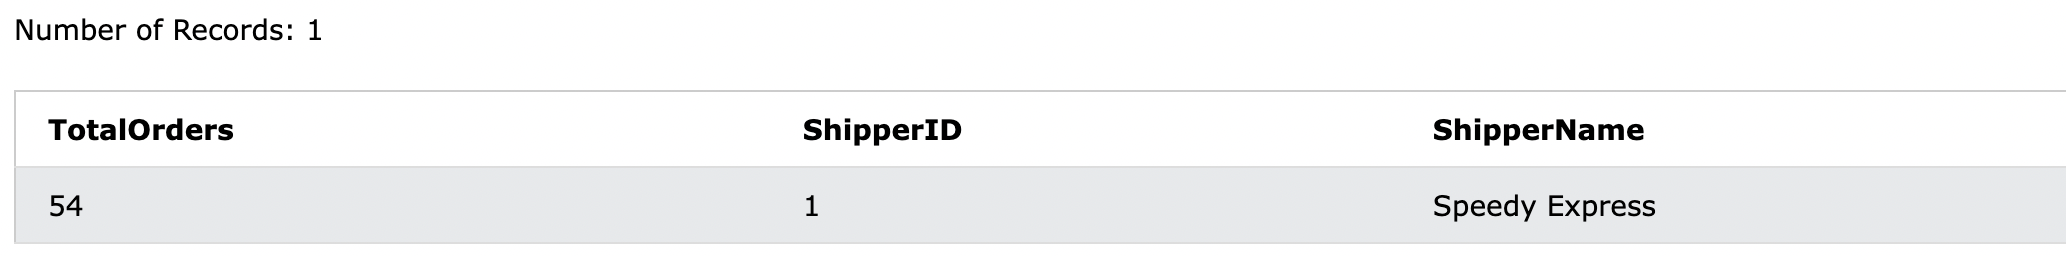

### 2b. What is the last name of the employee with the most orders?

```mysql
SELECT COUNT(Orders.OrderID) AS TotalOrders,
       Employees.LastName
FROM   Orders
       JOIN Employees
         ON Orders.EmployeeID = Employees.EmployeeID
GROUP  BY Orders.EmployeeID
ORDER  BY TotalOrders DESC
LIMIT  1;  
```

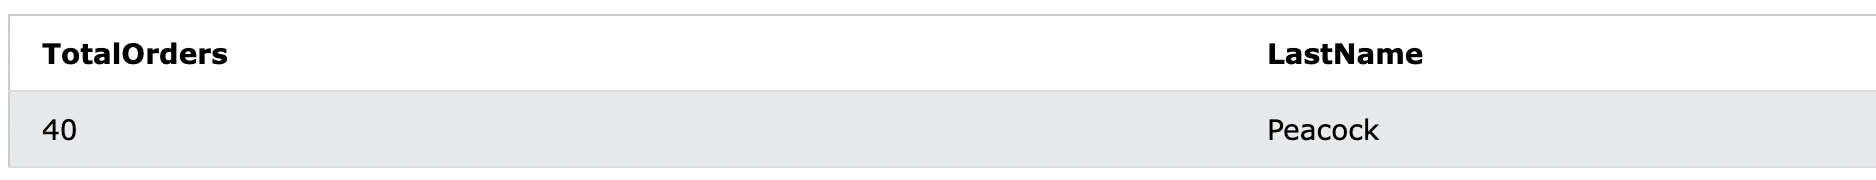

### 2c. What product was ordered the most by customers in Germany?

```mysql
SELECT COUNT(OrderDetails.ProductID) AS ProductCount,
       Products.ProductName
FROM   (((Orders
          INNER JOIN Customers
                  ON Orders.CustomerID = Customers.CustomerID)
         INNER JOIN OrderDetails
                 ON Orders.OrderID = OrderDetails.OrderID)
        INNER JOIN Products
                ON OrderDetails.ProductID = Products.ProductId)
WHERE  Customers.Country = 'Germany'
GROUP  BY Products.ProductName
ORDER  BY ProductCount DESC
LIMIT  1; 
```

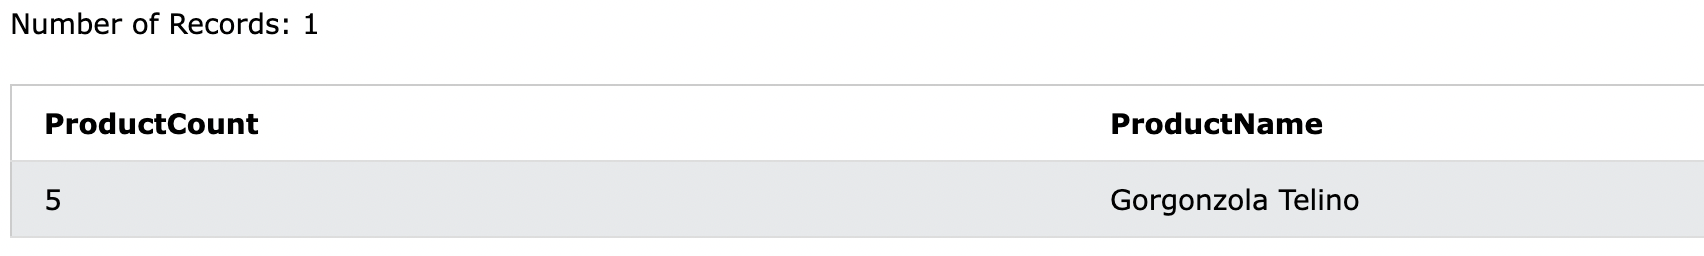